# COGS 108 Final Project

# Overview

For our project, we decided to see if we could predict the quality of wine given its ingredients. Since wine is so easily and heavily influenced by a number of factors that we can’t control for (i.e humidity, grape quality, etc), we wanted to focus on its internal workings. We hypothesized that the volume of certain features, namely alcohol percentage, volatile acidity and citric acid, were crucial in determining a wine’s quality rating. Using two datasets to test our prediction, we found that these, as well as the other characteristics, had no individual effect on overall rating, but rather, the rating was derived from a combination of different features. 


# Group Members - Names and ID 

- Alysha Ali (A15345048)
- Tsai-Ying Ying Chuang (A15215376)
- Zheng Zeng (A14679117) 
- Melody Yu (A14599481)
- Ai-Ting Hsieh (A13595395) 

# Part 1 - Introduction & Background
Since its creation 6000 years ago, wine has been adapted widely — from an instrument for religious ceremonies to a bargaining tool between countries (https://vinepair.com/wine-colonized-world-wine-history/#5). Despite the variety in usage, wine has constantly been regarded as a social device and has only risen in popularity (https://www.svb.com/globalassets/library/images/svb-2018-wine-report.pdf). That’s why, with the combination of the quickly-approaching legal drinking age for several of our group members and its increasing appearance in social media(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4432862/), we thought it was important to determine how the quality of a wine is determined. Specifically, we aim to discover exactly what ingredients are crucial in deriving a wine’s quality rating.


We came to our hypothesis by first researching wine characteristics (https://winefolly.com/review/wine-characteristics/). From there, we saw that certain elements, like citric acid content and volatile acidity, directly influenced a wine’s sweetness. From there, we looked at ranges and eliminated factors like water density, which only ranged from 0.99 to 1.00 and therefore could not have as large an impact on quality as other factors, like total sulfur dioxide for example, which had a range of over 200. 

This information is important for all consumers, from pre-teens getting their first sip of wine to experienced connoisseurs and businesses. With this data analysis, instead of spending hours trying to choose a wine everyone will love, party hosts and other entertainers will know what the most favored wine features are and be able to buy a delicious spirit in a snap. For instance, knowing what chemicals make a wine popular will reduce how much time winemakers spend in perfecting their formula and ultimately maximize efficiency and increase profit in the long run. Thus, this information can affect more than just consumers.

Since these datasets were previously the subject of a competition hosted by the University of California, Irvine, there have been several other projects that have analyzed similar questions and/or have used the same datasets. Most notably, is another study that also attempted to predict the quality of wine (https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine). However, they differed in their methods used and the overall accuracy of their machine learning model. 

## Our question
Can we predict the quality of a wine given a list of its physicochemical features?

## What we think
We hypothesize that we can predict the quality of the wine by its individual features. Especially, we predict that the lower volatile acidity, medium alcohol percentage, and higher citric acid will create the best quality of the wine.


# Part 2 - Data Wrangling

To answer our question, we will be using two datasets:  one on red wines and one on white wines (source: https://archive.ics.uci.edu/ml/datasets/wine+quality ). The red wine dataset had 1601 observations, while the white wine dataset had 4900. These datasets are identical in the features they analyze, namely a list of physiochemical ingredients in wine: 



- fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

- volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

- citric acid - found in small quantities, citric acid can add 'freshness' and flavor to wines

- residual sugar - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

- chlorides - the amount of salt in the wine

- free sulfur dioxide - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

- total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

- density - the density of water is close to that of water depending on the percent alcohol and sugar content

- pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

- sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

- alcohol - the percent alcohol content of the wine

- quality - output variable (based on sensory data, score between 0 and 10)



We combined the two in several ways during our process. For instance, in one part, we began by graphing the individual features together in order to see a comparison between white and red wines. In another part, we used random samples from both datasets in order to train and test our algorithm. 



## Setup 

In [1]:
import pandas as pd
import numpy as np
import pylab
import requests
import bs4
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from sklearn.utils import shuffle
from pandas.plotting import scatter_matrix

In [2]:
#Here we import the two datasets that we will be usiing in our final project
df_red = pd.read_csv('wineQualityReds.csv')
df_white = pd.read_csv('wineQualityWhites.csv')

# print out the column names
print(df_red.columns.values)

['Unnamed: 0' 'fixed.acidity' 'volatile.acidity' 'citric.acid'
 'residual.sugar' 'chlorides' 'free.sulfur.dioxide' 'total.sulfur.dioxide'
 'density' 'pH' 'sulphates' 'alcohol' 'quality']


# Part 3 - Data Cleaning, Processing & Visualization 

Here, we will clean up our data before we start analyzing. We will remove rows with missing data, and delete columns that are not useful. More explanation will be included as we clean up the data.

In [3]:
df_red[:5]

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_red.shape

(1599, 13)

Drop any row with missing values

In [5]:
df_red = df_red.dropna()

Drop the column labeled "Unnamed: 0"

In [6]:
df_red = df_red.drop(['Unnamed: 0'], axis=1)

In [7]:
df_red.shape

(1599, 12)

In [8]:
df_red[:5]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df_white[:5]

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
df_white.shape

(4898, 13)

Drop any rows with missing values

In [11]:
df_white = df_white.dropna()

Drop the column labeled as "Unnamed: 0"

In [12]:
df_white = df_white.drop(['Unnamed: 0'], axis=1)

In [13]:
df_white.shape

(4898, 12)

In [14]:
df_white[:5]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


We want to predict wine quality based on their ingredients therefore the information we need for each wine instance is the list of ingredient values and the quality. In the above cells, we first dropped any rows with missing values to ensure that we are using a dataset that contains exactly what we need. Since this is already a very clean dataset, none of the rows were dropped. The column labeled "Unnamed: 0" does not seem to be useful at all since we also have the index of each row. Therefore, we dropped the entire column. Now, the resulting dataframe only contains information we need.

Since the white wine dataset contains more instances, we will only take 1599 instances from it randomly to match the number of instances of red wine. 

In [15]:
df_white = shuffle(df_white).reset_index(drop = True)

df_white = df_white[:1599]

Here we will combine two wine sets.

In [16]:
# appending datasets of both white wine and red wine 
df_combined = df_red.append(df_white, ignore_index =True)
df_combined = shuffle(df_combined)
df_combined = df_combined.reset_index(drop=True)

df_combined.shape

(3198, 12)

In [17]:
desc = df_combined.describe()
desc

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000
mean,7.583646,0.403275,0.299096,4.476548,0.066779,25.726235,92.576610,0.995374,3.247730,0.573058,10.477923,5.766417
std,1.548254,0.190627,0.162999,4.185064,0.042376,17.624694,60.285855,0.002832,0.166444,0.167599,1.166156,0.865079
min,3.900000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.250000,8.400000,3.000000
25%,6.600000,0.260000,0.210000,1.900000,0.043000,12.000000,37.000000,0.993400,3.140000,0.460000,9.500000,5.000000
50%,7.200000,0.360000,0.300000,2.400000,0.059500,23.000000,89.000000,0.995770,3.240000,0.550000,10.200000,6.000000
75%,8.200000,0.530000,0.400000,5.800000,0.080000,36.000000,137.000000,0.997400,3.360000,0.650000,11.300000,6.000000
max,15.900000,1.580000,1.000000,26.050000,0.611000,289.000000,440.000000,1.003690,4.010000,2.000000,14.900000,9.000000


In [18]:
corrs = df_combined.corr()
corrs

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,0.164607,0.428162,-0.165393,0.291851,-0.333497,-0.387198,0.552513,-0.284667,0.337799,-0.085378,-0.031123
volatile.acidity,0.164607,1.000000,-0.459480,-0.296011,0.357460,-0.393076,-0.465839,0.313463,0.347821,0.200722,-0.091765,-0.324279
citric.acid,0.428162,-0.459480,1.000000,0.160784,0.067985,0.097314,0.166781,0.124229,-0.419689,0.115214,0.038144,0.160503
residual.sugar,-0.165393,-0.296011,0.160784,1.000000,-0.195659,0.466109,0.552173,0.337387,-0.309539,-0.250145,-0.260526,0.019710
chlorides,0.291851,0.357460,0.067985,-0.195659,1.000000,-0.238555,-0.316888,0.382405,0.037623,0.458298,-0.241790,-0.195790
free.sulfur.dioxide,-0.333497,-0.393076,0.097314,0.466109,-0.238555,1.000000,0.763651,-0.102860,-0.177164,-0.249057,-0.140284,0.056725
total.sulfur.dioxide,-0.387198,-0.465839,0.166781,0.552173,-0.316888,0.763651,1.000000,-0.145028,-0.294011,-0.339953,-0.198009,-0.005756
density,0.552513,0.313463,0.124229,0.337387,0.382405,-0.102860,-0.145028,1.000000,0.036369,0.320651,-0.623822,-0.293796
pH,-0.284667,0.347821,-0.419689,-0.309539,0.037623,-0.177164,-0.294011,0.036369,1.000000,0.160259,0.113856,-0.046110
sulphates,0.337799,0.200722,0.115214,-0.250145,0.458298,-0.249057,-0.339953,0.320651,0.160259,1.000000,0.013153,0.060222


By reading the above correlation table, it seems like none of the feature correlates with the wine's quality, we will plot out some matrices to see if that really is the case.

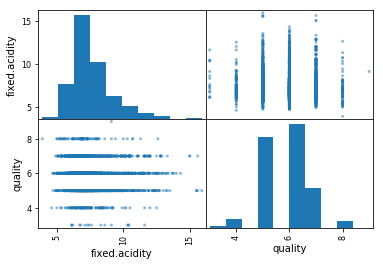

In [19]:
scatter_matrix(df_combined[['fixed.acidity','quality']])

f4 = plt.gcf()

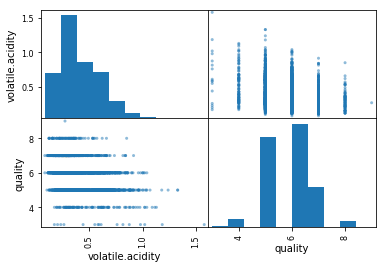

In [20]:
scatter_matrix(df_combined[['volatile.acidity','quality']])

f4 = plt.gcf()

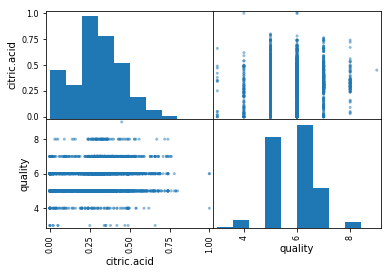

In [21]:
scatter_matrix(df_combined[['citric.acid','quality']])

f4 = plt.gcf()

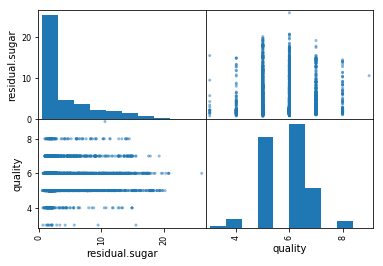

In [22]:
scatter_matrix(df_combined[['residual.sugar','quality']])

f4 = plt.gcf()

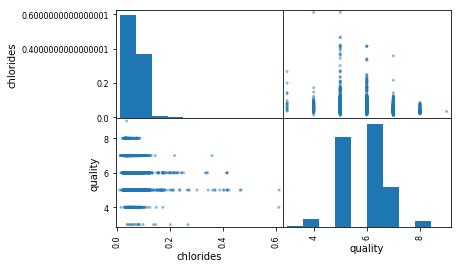

In [23]:
scatter_matrix(df_combined[['chlorides','quality']])

f4 = plt.gcf()

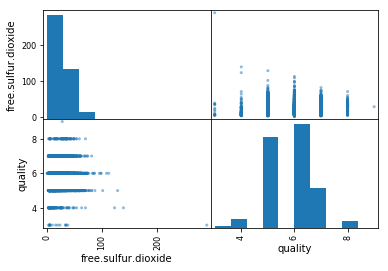

In [24]:
scatter_matrix(df_combined[['free.sulfur.dioxide','quality']])

f4 = plt.gcf()

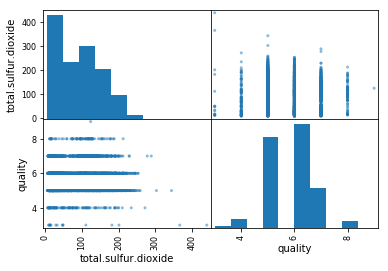

In [25]:
scatter_matrix(df_combined[['total.sulfur.dioxide','quality']])

f4 = plt.gcf()

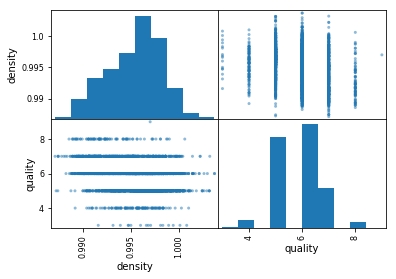

In [26]:
scatter_matrix(df_combined[['density','quality']])

f4 = plt.gcf()

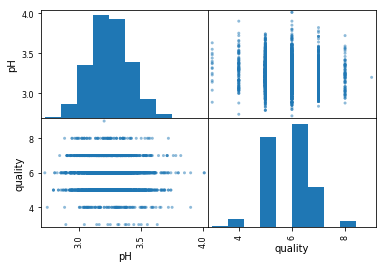

In [27]:
scatter_matrix(df_combined[['pH','quality']])

f4 = plt.gcf()

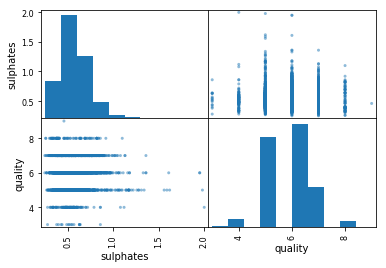

In [28]:
scatter_matrix(df_combined[['sulphates','quality']])

f4 = plt.gcf()

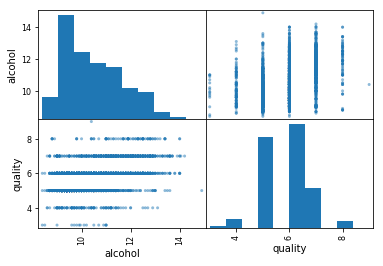

In [29]:
scatter_matrix(df_combined[['alcohol','quality']])

f4 = plt.gcf()

Since none of the feature seems to be highly correlated to the quality, 
we want to combine them all and see if doing so would allow us to predict the wine rating more accurately

In [30]:
df_combined.shape

(3198, 12)

Similar to A5, we will split our dataset into training set (80% of total) and testing set (20% of total). 

In [31]:
num_training = int(3198*.8)
num_training

2558

In [32]:
df_training = df_combined[:num_training]
df_testing = df_combined[num_training:]

The following show what out training set looks like if we ignore the kind of the wine.

In [33]:
df_training[:5]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,6.0,0.36,0.39,3.2,0.027,20.0,125.0,0.99100,3.38,0.39,11.3,7
1,10.1,0.28,0.46,1.8,0.050,5.0,13.0,0.99740,3.04,0.79,10.2,6
2,6.9,0.43,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5
3,8.0,0.27,0.33,1.2,0.050,41.0,103.0,0.99002,3.00,0.45,12.4,6
4,8.0,0.28,0.30,8.4,0.030,35.0,115.0,0.99192,2.93,0.42,12.3,6


Now, we will include some functions that can be useful later.

In [34]:
#takes in a dataframe and a list of list of indices, 
#and return the predicted rate(quality) for each whine in the dataframe
#based on the list of corresponding indices
def predict_rate(df, inds):
    rate_predict = []
    for i in inds:
        rateMap = {}
        rate_mode = 0
        for j in i:
            curr = df.loc[j, 'quality']
            if curr in rateMap.keys():
                rateMap[curr]+=1
            else: 
                rateMap[curr] = 1
            if rateMap[curr] > rate_mode:
                rate_mode = curr
        rate_predict.append(rate_mode)
    return rate_predict

In [35]:
#takes in a dataframe with an column containing the predicted wine quality
#and returns the error rate
def validation(df_after_prediction):
    error = 0
    num_row = 0
    # iterate through each row in df
    for idx, row in df_after_prediction.iterrows():
        num_row = num_row+1
        if not row['quality'] == row['predicted quality']:
            error = error+1
    errorPercent = error/num_row
    #print(errorPercent)
    return errorPercent

In [36]:
#takes in a dataframe
#and return a list of rows in the dataframe without the quality column
def get_row_list(df):
    rows_list=[]
    for idx, row in df.iterrows():
        curr_row = [row['fixed.acidity'],row['volatile.acidity'], 
                    row['citric.acid'],row['residual.sugar'], 
                    row['chlorides'], row['free.sulfur.dioxide'], 
                    row['total.sulfur.dioxide'], row['density'], 
                    row['pH'], row['sulphates'],
                    row['alcohol']]
        rows_list.append(curr_row) 
    return rows_list

In [37]:
#takes in: the training dataframe, the testing dataframe, the k value, 
#the testing dataframe's row list, a kd-tree and returns the result of validation
def getErrorPercent(df_training, df_testing, k_value, rows_list, tree):
    inds = tree.query(rows_list, k=k_value, return_distance = False)
    df_col_pred = predict_rate(df_training, inds)
    df_testing['predicted quality'] = df_col_pred
    return validation(df_testing)

We want to use the KD-tree in the sklearn library to predict the quality of a wine given its list of features(ingredients). A K-Dimensional tree is a tree data structure for organizing sample points in a k dimensional space. In out project, we have 11 dimensions as there are 11 features for each wine. A KDT will store our sample points (the rows of wine) according to all their features. Therefore, by querying the closest "neighbors" of a wine from the KDT, we get a list of other wines in the KDT positioned the closest to the query point. Since we have information about those wines' quality, we can then predict the query wine's quality by taking the quality with the highest occurence among the nearest neighbors. 

Now, we will build the KDT using the training dataset.

In [38]:
#list of rows of the training dataframe
rows_list_training = get_row_list(df_training)

#the KD Tree that stores all the wines in the training set
tree = KDTree(rows_list_training)

After building the KD tree, we want to know how many numbers of neighbors we should query from it in order to get the most accurate prediction. Out initial guess is 5, but we want to actually go through more possible values to make sure we choose a best k value.

In [39]:
#going through possible k values [1,40]
k_val = np.arange(1, 41, 1)
err_val=[]
for i in k_val:
    df_training_cpy = df_training.copy()
    err_val.append(getErrorPercent(df_training, df_training_cpy, 
                                   i ,rows_list_training, tree))
df_err = pd.DataFrame()
df_err['k value'] = k_val
df_err['error'] = err_val

In [40]:
df_err[:10]

,k value,error
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000
5,6,0.002346
6,7,0.011728
7,8,0.027365
8,9,0.052385
9,10,0.098124


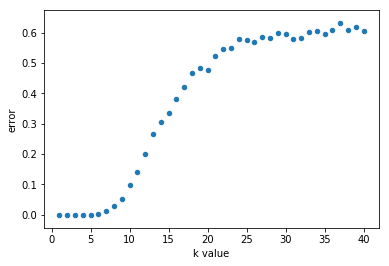

In [41]:
df_err
df_err.plot.scatter(x='k value', y='error')

After checking through a set of k value candidates, we decide that k=5 would  be the best choice. Because it gives us a very low error. Although k values less than 5 seem to have even lower error rates, there are a few reasons why we did not choose them:

1) We do not want to choose an even k value becuase we will then need to worry about having a tie. 

2) k=1 and k=3 are odd numbers, but still not nice choices as they are too small.

We will now query 5 nearest neighbors for each wine instance in our training data set, predict the quality, and add to the dataframe.

In [53]:
#the list of rows of the training dataset
rows_list_training = get_row_list(df_training)

#the list of lists of nearest neighbor indices
inds_k_5_training = tree.query(rows_list_training, k=5, return_distance = False)

#the list of predicted quality of each wine
df_training['predicted quality'] = predict_rate(df_training, inds_k_5_training)


/Users/aitinghsieh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
df_training[:5]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,predicted quality
0,6.0,0.36,0.39,3.2,0.027,20.0,125.0,0.99100,3.38,0.39,11.3,7,7
1,10.1,0.28,0.46,1.8,0.050,5.0,13.0,0.99740,3.04,0.79,10.2,6,6
2,6.9,0.43,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5,5
3,8.0,0.27,0.33,1.2,0.050,41.0,103.0,0.99002,3.00,0.45,12.4,6,6
4,8.0,0.28,0.30,8.4,0.030,35.0,115.0,0.99192,2.93,0.42,12.3,6,6


We will compute the error percentage of our prediction.

In [44]:
error_training = getErrorPercent(df_training, df_training, 5,
                                 rows_list_training,tree)
error_training

/Users/aitinghsieh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.0

Now that our model is ready, we will go ahead and start predicting the quality of wines in the testing dataset. 

In [45]:
#the list of rows in the testing set
rows_list_testing = get_row_list(df_testing)

#the list of lists of nearest neighbor indices
inds_k_5_testing = tree.query(rows_list_testing, k=5, return_distance = False)

#the list of predicted quality of each wine
df_testing['predicted quality'] = predict_rate(df_training, inds_k_5_testing)

/Users/aitinghsieh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
# err_testing = getErrorPercent(df_training, df_testing, 5, rows_list_testing)
err_testing = validation(df_testing)
err_testing

0.4953125

# Part 4 - Data Analysis / Results

It turned out that the error percentage is pretty big, oppposite from what we were expecting. Therefore, now we want to see how in accurate our prediction is. 

In [47]:
df_testing[:10]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,predicted quality
2558,6.4,0.57,0.14,3.9,0.070,27.0,73.0,0.99669,3.32,0.48,9.2,5,5
2559,8.6,0.49,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5,6
2560,7.0,0.25,0.32,9.0,0.046,56.0,245.0,0.99550,3.25,0.50,10.4,6,6
2561,8.7,0.63,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6,5
2562,7.1,0.59,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,6,6
2563,10.6,0.31,0.49,2.2,0.063,18.0,40.0,0.99760,3.14,0.51,9.8,6,5
2564,6.3,0.22,0.27,4.5,0.036,81.0,157.0,0.99280,3.05,0.76,10.7,7,6
2565,6.5,0.25,0.20,1.4,0.024,29.0,101.0,0.99160,3.24,0.54,10.8,6,7
2566,7.2,0.66,0.03,2.3,0.078,16.0,86.0,0.99743,3.53,0.57,9.7,5,5
2567,8.2,0.37,0.64,13.9,0.043,22.0,171.0,0.99873,2.99,0.80,9.3,5,7


It looks like some wines have the same predicted and actual quality while some others don't. We will need to do some more work to see how our algorithm performs.

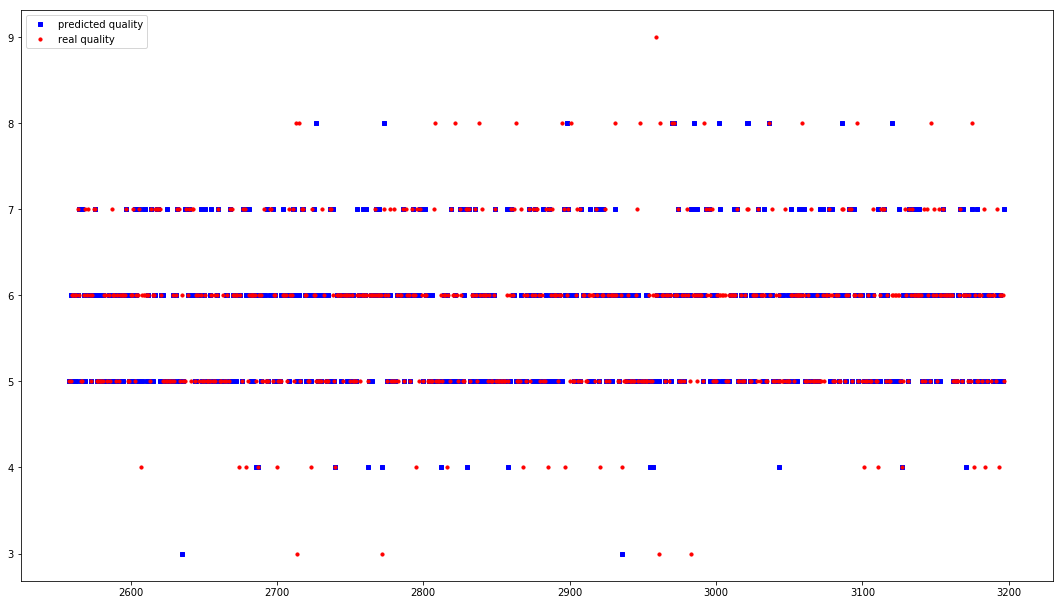

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax1 = fig.add_subplot(111)

ax1.scatter(df_testing.index, df_testing['predicted quality'], 
            s=10, c='b', marker="s", label='predicted quality')
ax1.scatter(df_testing.index, df_testing['quality'], s=10, c='r',
            marker="o", label='real quality')
plt.legend(loc='upper left')
plt.show()

The scatter plot above does not look so nice and we cannot really tell much about our prediction by looking at it. Thus, we will calculate the root mean sqaure error we got and store the value in our dataframe.  

In [49]:
#takes in two values and calculautes their root mean square difference
#and then returns that result
def rmse(pred, tar):
    diff = pred - tar                       
    diff_sq = diff ** 2                    
    mean_diff_sq = diff_sq.mean()  
    rmse_val = np.sqrt(mean_diff_sq)          
    return rmse_val*1.0

In [50]:
df_testing['rms']=0.0
for i in df_testing.index:
        df_testing.at[i,'rms'] = rmse(df_testing.at[i,'predicted quality'],
                                      df_testing.at[i,'quality'])

/Users/aitinghsieh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_testing[:10]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,predicted quality,rms
2558,6.4,0.57,0.14,3.9,0.070,27.0,73.0,0.99669,3.32,0.48,9.2,5,5,0.0
2559,8.6,0.49,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5,6,1.0
2560,7.0,0.25,0.32,9.0,0.046,56.0,245.0,0.99550,3.25,0.50,10.4,6,6,0.0
2561,8.7,0.63,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6,5,1.0
2562,7.1,0.59,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,6,6,0.0
2563,10.6,0.31,0.49,2.2,0.063,18.0,40.0,0.99760,3.14,0.51,9.8,6,5,1.0
2564,6.3,0.22,0.27,4.5,0.036,81.0,157.0,0.99280,3.05,0.76,10.7,7,6,1.0
2565,6.5,0.25,0.20,1.4,0.024,29.0,101.0,0.99160,3.24,0.54,10.8,6,7,1.0
2566,7.2,0.66,0.03,2.3,0.078,16.0,86.0,0.99743,3.53,0.57,9.7,5,5,0.0
2567,8.2,0.37,0.64,13.9,0.043,22.0,171.0,0.99873,2.99,0.80,9.3,5,7,2.0


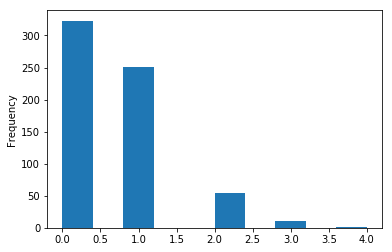

In [52]:
df_testing['rms'].plot.hist()

We can see that the error we get is actually very small. The predicted quality is in the most case actual quality ± 1, with a few ones having a more inaccurate result. So after all, our prediction is still not bad.

# Part 5 - Ethics and Privacy 

In our ventures in trying to determine what predicts wine quality, it is important to consider who and what may be negatively impacted by the results we obtain. Our results may reveal that certain qualities in wine are more favorable than others, affecting the business of companies that may be known to have more or less of a favorable quality. For example, if it is found that a wine with a higher sugar content is less favorable, companies and vineyards known for sweeter wines may find their businesses negatively impacted. Additionally, if a certain company claims the key to quality is one specific physicochemical property and we find their information to be false, that company may also find their business to be negatively impacted. With more awareness as to what makes a quality wine, perceived high quality wine price could drop and perceived low quality price could increase, if our results dispute their perception. 

Additionally, it is important to consider that our data is limited, biased, and skewed. We cannot be sure that the data was collected in a way that is accurate, precise, and equitable. Since all our data is from one wine company, we are sure that all variations of wine in the world and that all physicochemical properties affecting taste are not represented in our dataset. With this in mind, if our results grow in popularity, it can lead to positive or negative business for the company who provided this data, depending on results. Lastly, we know that wine quality is subjective and the “rating” portion of our data is biased. With biased ratings, it is also likely that the results are skewed, with more ratings at extreme ends than close to a median. With all this in mind, we also consider that our results cannot be fully used to defend a hypothesis, and that outside evidence is necessary for full confirmation.


# Part 6 - Conclusion & Discussion 

In conclusion, we found that though we are able to somewhat predict wine quality, it is still not fine tuned enough to use ethically. Our prediction is generally on par, sometimes slightly off, than the real quality, within 2 at most. In relation to our hypothesis, all our factors of physicochemical features combine to create different optimal wines, meaning that all of our factors are involved in creating the proper flavor profile. Our original hypothesis predicts that lower volatile acidity, medium alcohol percentage, and higher citric acid would create the best quality, and we did not necessarily find that to be true. Interestingly, though we are already working with 12 variables, there are still contributors to wine quality that are missing. With each of the 12, we were unable to find one that stood out or a few that stood out together in making a quality wine. They all needed to combine with one another in a grand way to make a high quality wine.

A possible confound is in variables that cannot directly be measured from the wine itself. Many experts cite the climate and soil at the vineyard in which the wine originated, something that was not taken into account with our data. This may account for part of the inaccuracy we faced. Limitations in our data may also account for inaccuracy. As stated before, we cannot be sure of the precision with which the data was collected. Additionally, all of the wine in our dataset came from the same vineyard, limiting our scope. Our dataset also lacked wine at the extreme ends of high and low quality, limiting our training, thus leading to inaccuracy. A few confounds are inevitable, but it may have done us well to try to alleviate some of their effects.

If we were to continue this project, it may help to look deeper in to advanced data science techniques for tackling problems like this. In our pursuit to predict what makes a high quality wine, we found and learned about KD Tree, which made sense of our data when we could not. There may be more techniques out there that would’ve better our predictions and help us properly pinpoint the best wine. Additionally, the addition of more data may have helped us better find the correlations we were looking for. Despite our attempts, the one true perfect wine is still somewhat of a mystery, but we are sure data scientists will tackle it better than we could.
